# Imports

In [1]:
import os
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog


In [2]:
from pycocotools.coco import COCO

# Path to the COCO annotations file
annotations_file = "archive\\train\\_annotations.coco.json"

# Initialize COCO api for instance annotations
coco = COCO(annotations_file)

# Get the number of classes
categories = coco.loadCats(coco.getCatIds())
num_classes = len(categories)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


# Register the COCO tumor dataset

## Train

In [2]:
# Example paths; replace with your actual file paths
dataset_name = "tumor" # This can be any string that identifies your dataset
json_file = "archive\\train\\_annotations.coco.json" # Path to your COCO JSON file
image_root = "archive\\train" # Directory containing the images

register_coco_instances(dataset_name, {}, json_file, image_root)

# Optionally, check the dataset's metadata (e.g., class names)
my_dataset_metadata = MetadataCatalog.get(dataset_name)
print(my_dataset_metadata)

# To view the dataset or an example, you can load it and inspect an entry
dataset_dicts = DatasetCatalog.get(dataset_name)

# View the first entry to get a sense of the annotation format
print(dataset_dicts[0])



Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Metadata(name='tumor', json_file='archive\\train\\_annotations.coco.json', image_root='archive\\train', evaluator_type='coco')
{'file_name': 'archive\\train\\2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg', 'height': 640, 'width': 640, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [145, 239, 168.75, 162.5], 'category_id': 1, 'segmentation': [[313.75, 238.75, 145, 238.75, 145, 401.25, 313.75, 401.25, 313.75, 238.75]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}


In [3]:
dataset_dicts

[{'file_name': 'archive\\train\\2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg',
  'height': 640,
  'width': 640,
  'image_id': 0,
  'annotations': [{'iscrowd': 0,
    'bbox': [145, 239, 168.75, 162.5],
    'category_id': 1,
    'segmentation': [[313.75,
      238.75,
      145,
      238.75,
      145,
      401.25,
      313.75,
      401.25,
      313.75,
      238.75]],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>}]},
 {'file_name': 'archive\\train\\2871_jpg.rf.3b6eadfbb369abc2b3bcb52b406b74f2.jpg',
  'height': 640,
  'width': 640,
  'image_id': 1,
  'annotations': [{'iscrowd': 0,
    'bbox': [194, 176, 148.75, 233.75],
    'category_id': 1,
    'segmentation': [[342.5,
      176.25,
      193.75,
      176.25,
      193.75,
      410,
      342.5,
      410,
      342.5,
      176.25]],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>}]},
 {'file_name': 'archive\\train\\2921_jpg.rf.3b952f91f27a6248091e7601c22323ad.jpg',
  'height': 640,
  'width': 640,
  'image_id': 2,
  'annotations': [{'iscro

## Test

In [4]:
# Example paths; replace with your actual file paths
dataset_name = "tumor_test" # This can be any string that identifies your dataset
json_file = "archive\\test\\_annotations.coco.json" # Path to your COCO JSON file
image_root = "archive\\test" # Directory containing the images

register_coco_instances(dataset_name, {}, json_file, image_root)

# Optionally, check the dataset's metadata (e.g., class names)
my_dataset_metadata1 = MetadataCatalog.get(dataset_name)
print(my_dataset_metadata)

# To view the dataset or an example, you can load it and inspect an entry
dataset_dicts1 = DatasetCatalog.get(dataset_name)

# View the first entry to get a sense of the annotation format
print(dataset_dicts[0])



Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Metadata(name='tumor', json_file='archive\\train\\_annotations.coco.json', image_root='archive\\train', evaluator_type='coco', thing_classes=['Tumor', '0', '1'], thing_dataset_id_to_contiguous_id={0: 0, 1: 1, 2: 2})
{'file_name': 'archive\\train\\2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg', 'height': 640, 'width': 640, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [145, 239, 168.75, 162.5], 'category_id': 1, 'segmentation': [[313.75, 238.75, 145, 238.75, 145, 401.25, 313.75, 401.25, 313.75, 238.75]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}


# Visualize the dataset

In [6]:
from detectron2.utils.visualizer import Visualizer
import cv2
import random

# Load a random image from the dataset
d = random.choice(dataset_dicts)
img = cv2.imread(d["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_metadata, scale=0.5)
out = visualizer.draw_dataset_dict(d)


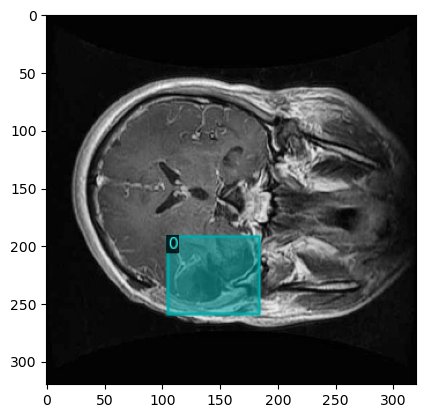

In [7]:
import matplotlib.pyplot as plt
plt.grid(visible=False)
plt.imshow(out.get_image()[:, :, ::-1])
plt.show()

# Load model for training

In [8]:
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

cfg = get_cfg()
# Select a model from Detectron2's model zoo
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")

# Set the dataset and number of classes
cfg.DATASETS.TRAIN = ("tumor",)
cfg.DATASETS.TEST = ("tumor_test",)  # If you have a validation set, you can specify it here
cfg.DATALOADER.NUM_WORKERS = 1
cfg.MODEL.DEVICE = "cuda"

# Let's assume we have 2 classes: the background and your tumor class
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3 # Update this according to your dataset

# Set the output directory
cfg.OUTPUT_DIR = "output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Other configurations to tweak based on your dataset and resources
cfg.SOLVER.IMS_PER_BATCH = 3 # Lower if your GPU runs out of memory
cfg.SOLVER.BASE_LR = 0.000215  # Pick a learning rate
cfg.SOLVER.MAX_ITER = 3000    # Adjust the number of iterations according to your dataset size
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   # Higher means more memory usage but faster training


In [9]:
from detectron2.engine import DefaultTrainer

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


[02/15 10:51:45 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (12, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (12,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (3, 256, 1, 1) 

[02/15 10:51:46 d2.engine.train_loop]: Starting training from iteration 0


c:\Users\aditt\anaconda3\envs\tumor_dl_n\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[02/15 10:52:19 d2.utils.events]:  eta: 1:13:28  iter: 19  total_loss: 2.655  loss_cls: 1.799  loss_box_reg: 0.07677  loss_mask: 0.6946  loss_rpn_cls: 0.08896  loss_rpn_loc: 0.008349    time: 1.4505  last_time: 1.3584  data_time: 0.1887  last_data_time: 0.0257   lr: 4.2959e-06  max_mem: 5402M
[02/15 10:52:52 d2.utils.events]:  eta: 1:16:22  iter: 39  total_loss: 2.446  loss_cls: 1.571  loss_box_reg: 0.06779  loss_mask: 0.6911  loss_rpn_cls: 0.08623  loss_rpn_loc: 0.006608    time: 1.5353  last_time: 1.6960  data_time: 0.0291  last_data_time: 0.0304   lr: 8.5916e-06  max_mem: 5407M
[02/15 10:53:24 d2.utils.events]:  eta: 1:16:02  iter: 59  total_loss: 2.016  loss_cls: 1.171  loss_box_reg: 0.07467  loss_mask: 0.6817  loss_rpn_cls: 0.06653  loss_rpn_loc: 0.007206    time: 1.5565  last_time: 1.6938  data_time: 0.0285  last_data_time: 0.0255   lr: 1.2887e-05  max_mem: 5407M
[02/15 10:53:57 d2.utils.events]:  eta: 1:17:15  iter: 79  total_loss: 1.611  loss_cls: 0.7398  loss_box_reg: 0.07577 

# Save the final model

In [12]:
# Now, instead of converting to a dictionary, directly save to a YAML file
config_str = cfg.dump()  # This converts the config to a YAML-formatted string

# Save the YAML string to a file
config_filename = "your_config_file.yaml"
with open(config_filename, "w") as f:
    f.write(config_str)

# Visualize the predictions


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



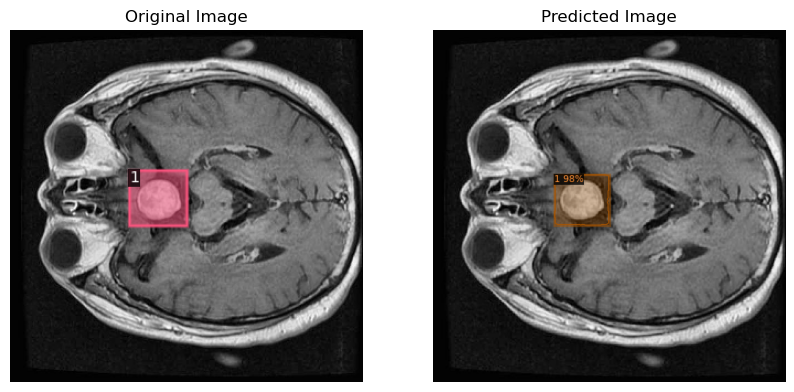

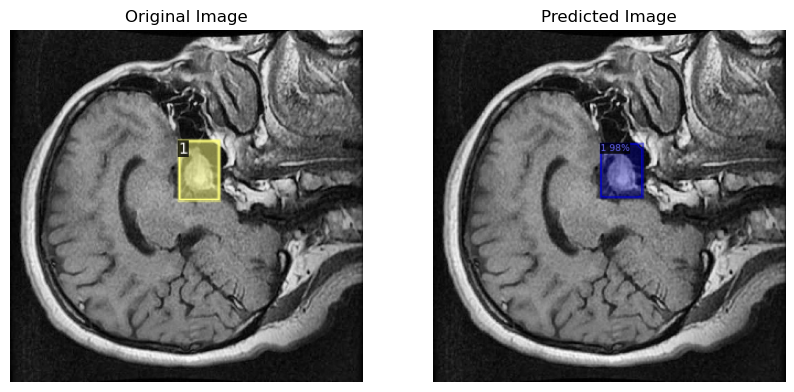

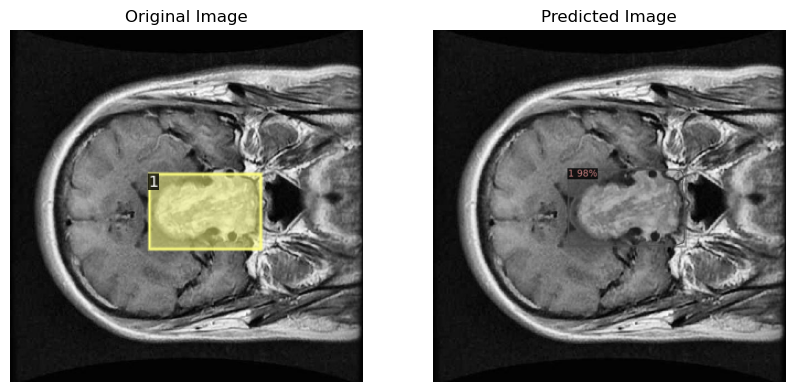

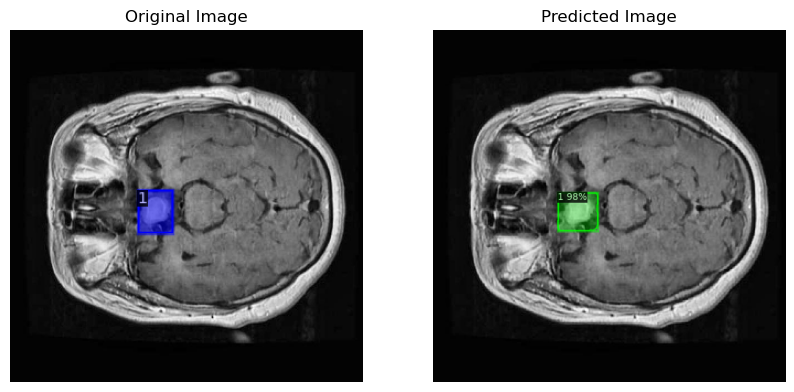

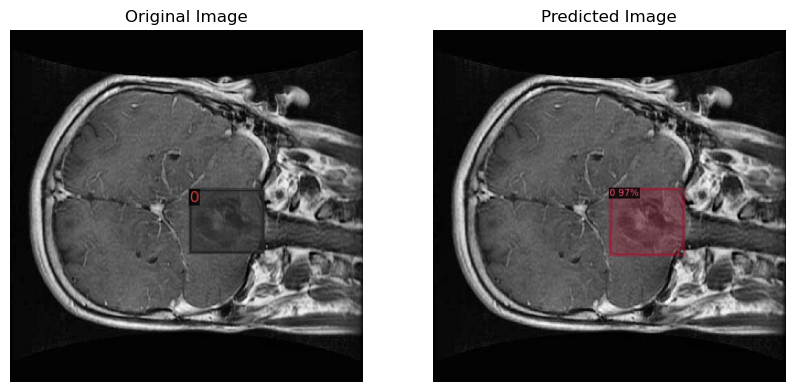

In [16]:
# Import necessary libraries
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg

from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2
import matplotlib.pyplot as plt
my_dataset_test_metadata = MetadataCatalog.get("tumor")
from detectron2.utils.visualizer import ColorMode
import random

dataset_dicts = DatasetCatalog.get("tumor")
# Function to setup model configuration and return a predictor
def setup_cfg(config_path, model_weights, score_threshold=0.8):

    cfg = get_cfg()
    cfg.MODEL.WEIGHTS = model_weights
    cfg.merge_from_file(config_path)  # Path to the config file
    cfg.MODEL.WEIGHTS = model_weights  # Path to the model weights
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_threshold  # Minimum prediction score
    return DefaultPredictor(cfg)

# Function to perform inference and visualize results on an image
def predict_and_visualize(predictor):
    d = random.choice(dataset_dicts)
    im = cv2.imread(d["file_name"])
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    #im = cv2.imread(image_path)
    outputs = predictor(im)
    metadata = MetadataCatalog.get(predictor.cfg.DATASETS.TRAIN[0])

    visualizer = Visualizer(im, metadata=my_dataset_test_metadata, scale=0.5)
    out = visualizer.draw_dataset_dict(d)

    v = Visualizer(im[:, :, ::-1], metadata=my_dataset_test_metadata, scale=0.8, instance_mode=ColorMode.IMAGE_BW)
    out1 = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    result_image = out1.get_image()
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the first image
    axs[0].imshow(out.get_image())
    axs[0].axis("off")
    axs[0].set_title("Original Image")

    # Plot the second image
    axs[1].imshow(result_image)
    axs[1].axis("off")
    axs[1].set_title("Predicted Image")

    # Show the plot
    plt.axis("off")
    plt.show()



config_path = 'your_config_file.yaml'
model_weights = "output\model_final.pth"
image_path = "archive\\test\\214_jpg.rf.28a9bdc47bd9a90f3b7981b25d7b4380.jpg"

# Setup model configuration and predictor
predictor = setup_cfg(config_path, model_weights, score_threshold=0.8)

# Perform inference and visualize results
for i in range(5):
    predict_and_visualize(predictor)
